# Q2) Logistic Regression : Heart Disease Prediction using Logistic Regression. 

In [29]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sn

In [30]:
# dataset
df = pd.read_csv("Downloads/framingham.csv")
df.drop(['education'], inplace = True, axis = 1)
df.rename(columns ={'male':'Sex_male'}, inplace = True)

In [31]:
# removing NaN / NULL values
df.dropna(axis = 0, inplace = True)
df.head()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [32]:
df.shape

(3749, 15)

In [33]:
df.keys()

Index(['Sex_male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3749 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex_male         3749 non-null   int64  
 1   age              3749 non-null   int64  
 2   currentSmoker    3749 non-null   int64  
 3   cigsPerDay       3749 non-null   float64
 4   BPMeds           3749 non-null   float64
 5   prevalentStroke  3749 non-null   int64  
 6   prevalentHyp     3749 non-null   int64  
 7   diabetes         3749 non-null   int64  
 8   totChol          3749 non-null   float64
 9   sysBP            3749 non-null   float64
 10  diaBP            3749 non-null   float64
 11  BMI              3749 non-null   float64
 12  heartRate        3749 non-null   float64
 13  glucose          3749 non-null   float64
 14  TenYearCHD       3749 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 468.6 KB


In [35]:
df['TenYearCHD'].value_counts()

0    3177
1     572
Name: TenYearCHD, dtype: int64

### Data Visualization

##### Correlation Matrix

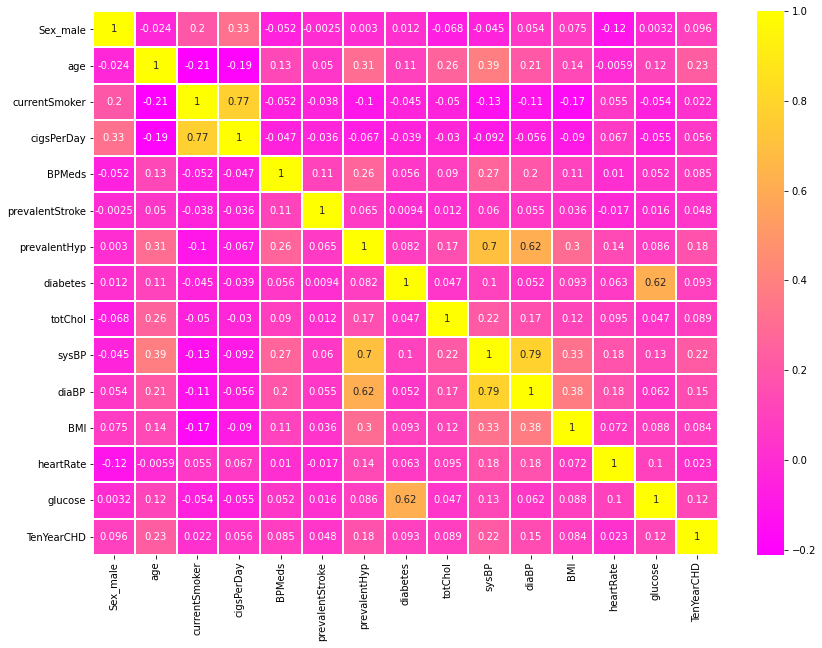

In [71]:
plt.figure(figsize = (14, 10)) 
sn.heatmap(df.corr(), cmap='spring',annot=True, linecolor='White', linewidths=1.0)
plt.show()

##### Pairplot

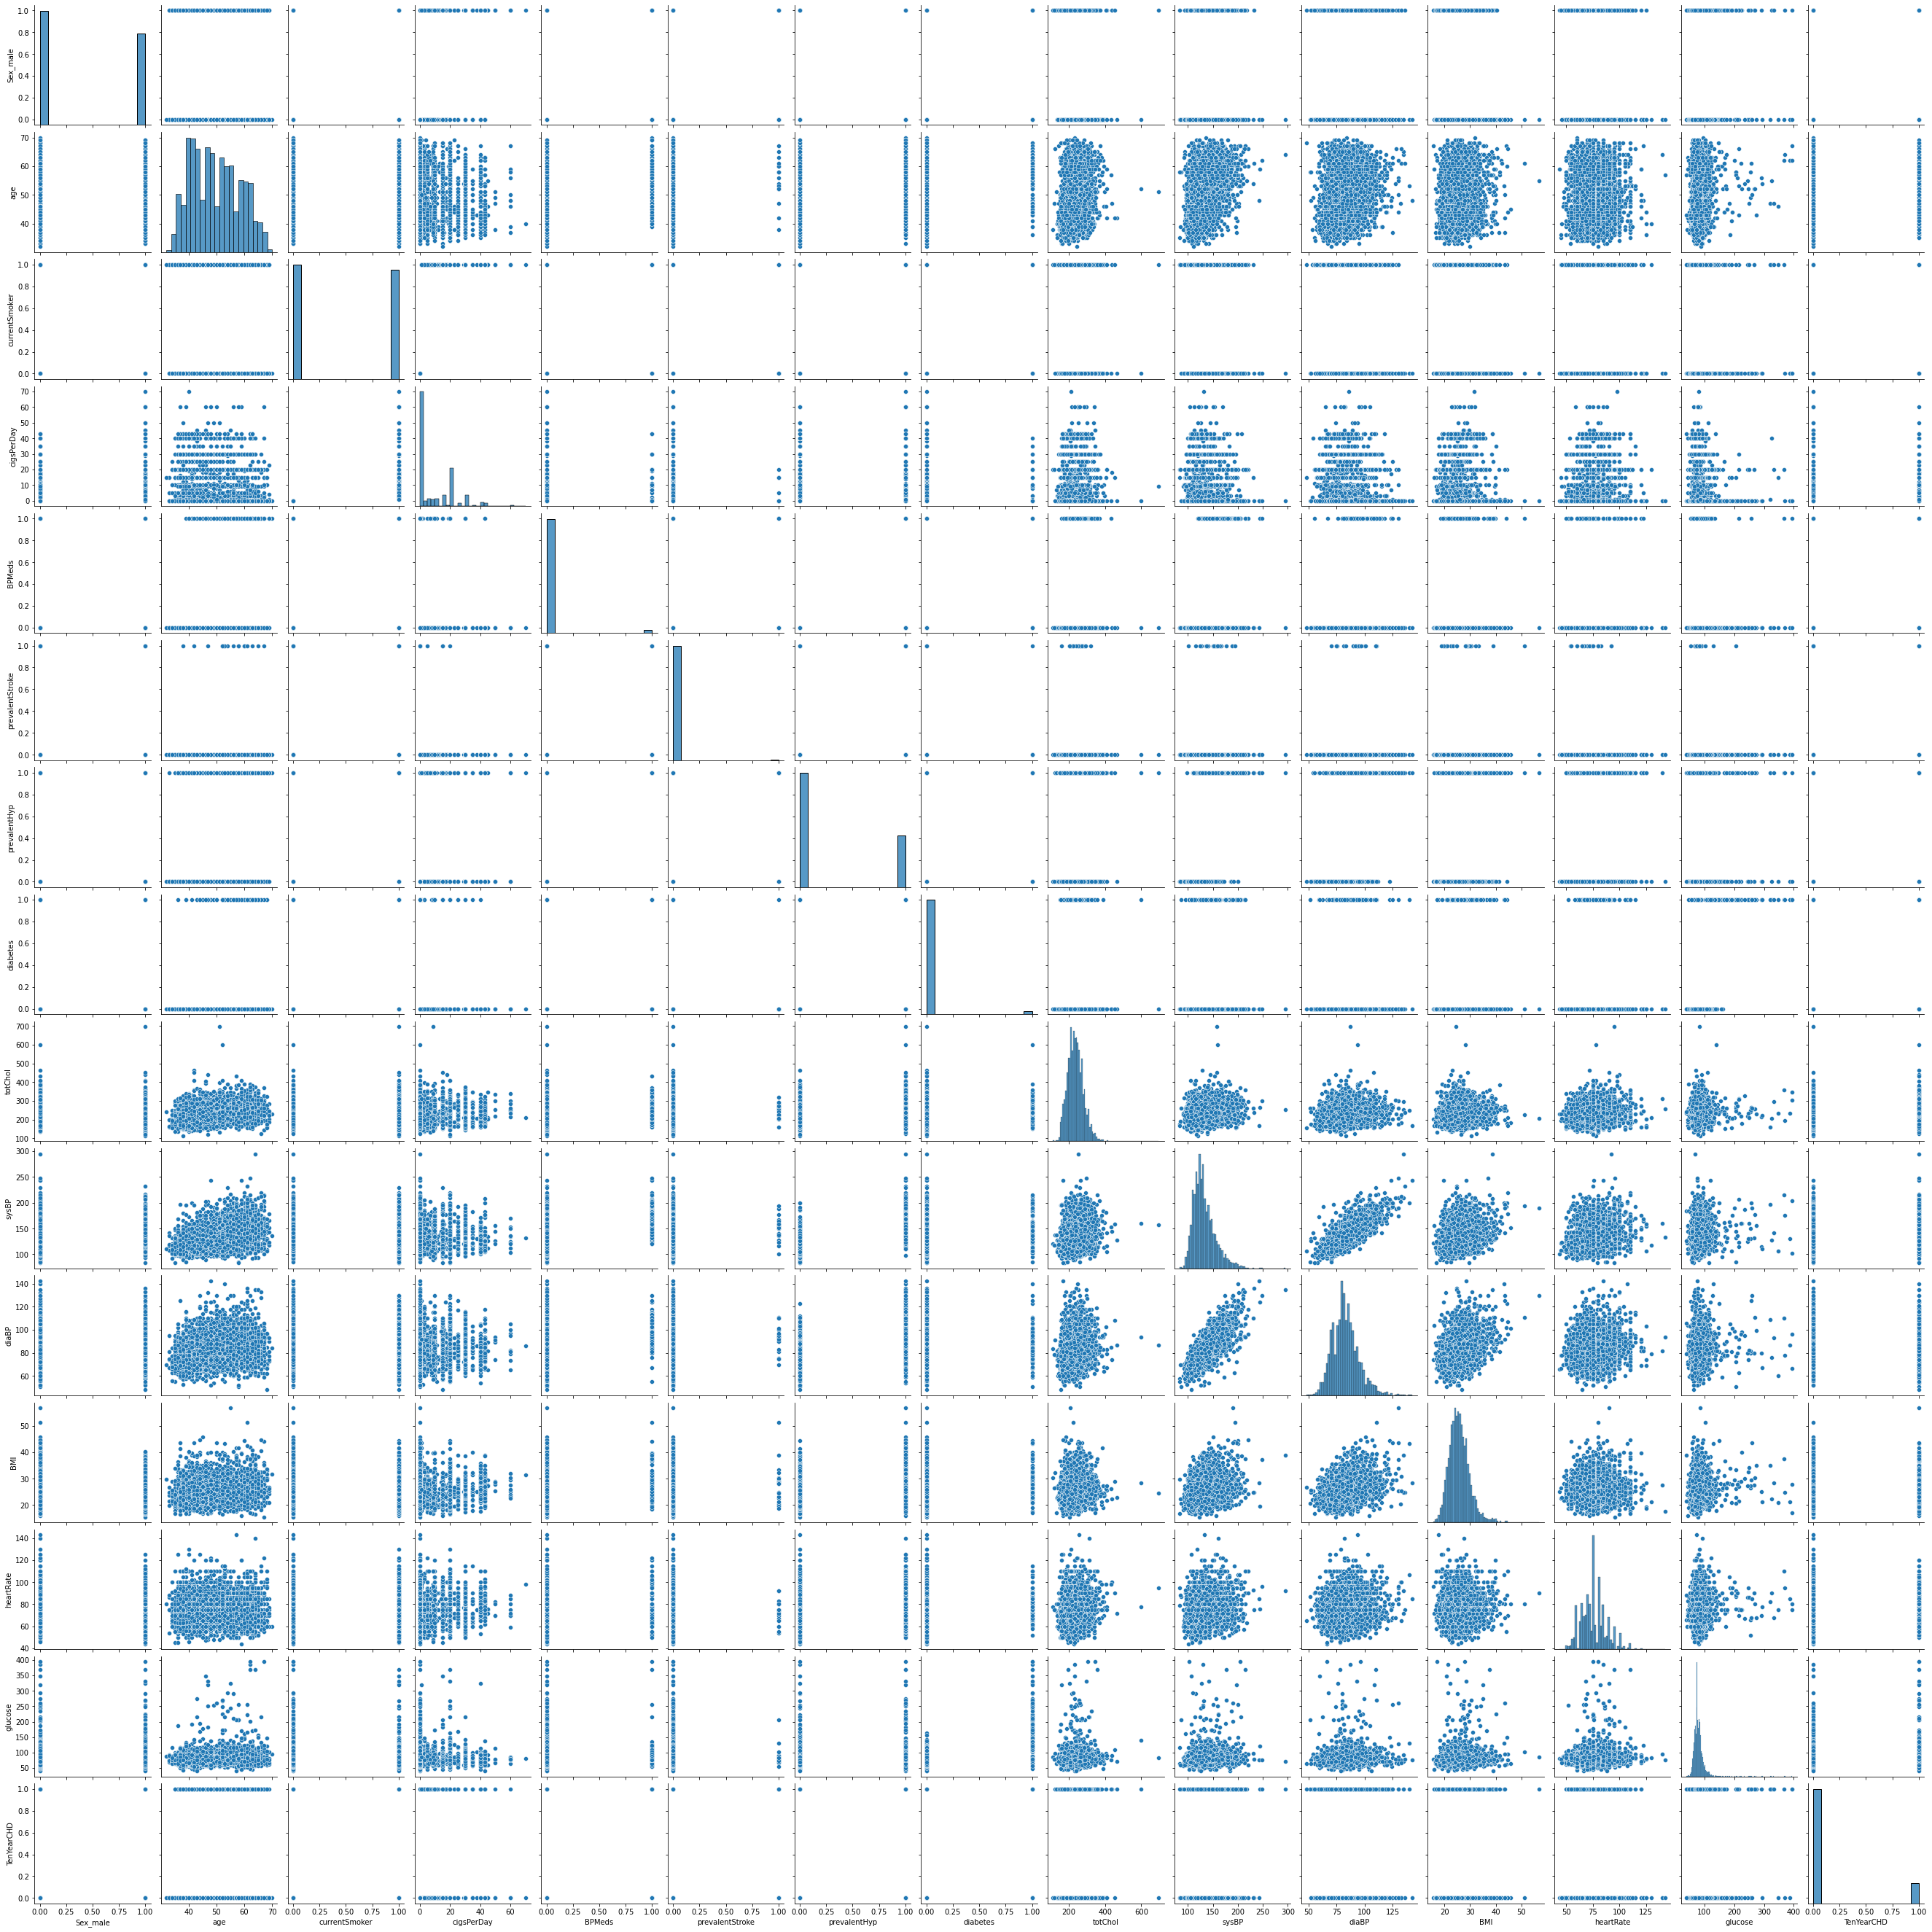

In [37]:
sn.pairplot(df)
plt.show()

##### Countplot of people based on their sex and whether they are Current Smoker or not

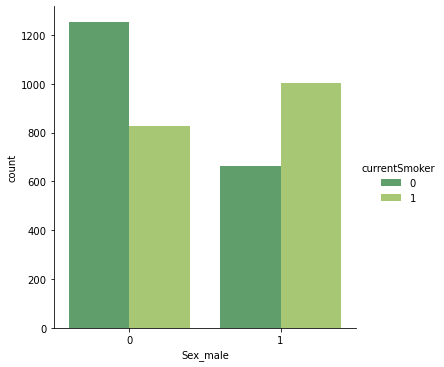

In [72]:
sn.catplot(data=df, kind='count', x='Sex_male',hue='currentSmoker', palette ="summer")
plt.show()

##### Countplot - subplots of No. of people affecting with CHD on basis of their sex and current smoking.

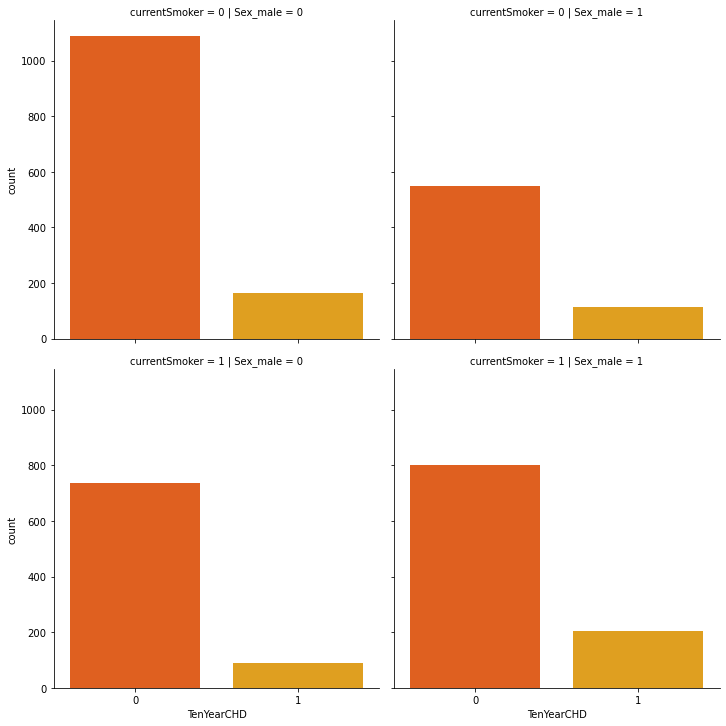

In [73]:
sn.catplot(data=df, kind='count', x='TenYearCHD', col='Sex_male',row='currentSmoker', palette='autumn')
plt.show()

### Machine Learning

##### Separating the data into feature and target data.

In [51]:
X = df.iloc[:,0:14]
y = df.iloc[:,14:15]

In [52]:
X.head()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [53]:
y.head()

,TenYearCHD
0,0
1,0
2,0
3,1
4,0


##### Importing the model and assigning the data for training and test set

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=21)

##### Applying the ML model - Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

##### Accuracy Prediction

In [59]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
score = logreg.score(X_test, y_test)
print("Accuracy:",score) 

Accuracy: 0.8417777777777777


C:\Users\abhij\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\abhij\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Getting the Confusion Matrix and Classification Report

##### Confusion Matrix

In [61]:
from sklearn.metrics import confusion_matrix, classification_report 
cm = confusion_matrix(y_test, y_pred) 
print("Confusion Matrix is:\n\n",cm)

Confusion Matrix is:

 [[942   4]
 [174   5]]


##### Classification Report

In [62]:
print("Classification Report is:\n\n",classification_report(y_test,y_pred))

Classification Report is:

               precision    recall  f1-score   support

           0       0.84      1.00      0.91       946
           1       0.56      0.03      0.05       179

    accuracy                           0.84      1125
   macro avg       0.70      0.51      0.48      1125
weighted avg       0.80      0.84      0.78      1125



##### Plotting Confusion Matrix

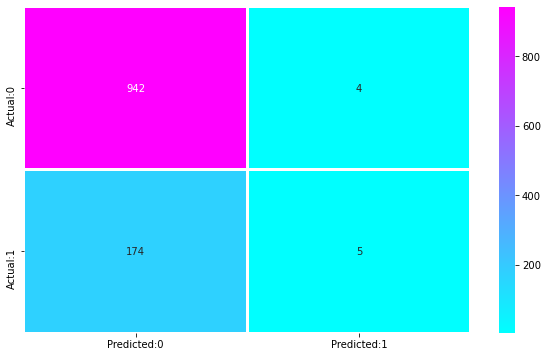

In [66]:
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (10, 6)) 
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "cool", linecolor="White", linewidths=1.5) 
plt.show() 